In [1]:
library(ggplot2)
library(glue)
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
data_dir <- '/Users/u1001626/Documents/PhD/Statistical Practice/Projects/Project2/zoib_output'

In [3]:
post_pred <- readRDS(glue("{data_dir}/post_op_pred.rds"))
pre_pred <- readRDS(glue("{data_dir}/pre_op_pred.rds"))
post_res <- readRDS(glue("{data_dir}/post_op_res.rds"))
pre_res <- readRDS(glue("{data_dir}/pre_op_res.rds"))

In [4]:
post_pdf <- rep(0,115)
post_rdf <- rep(0,115)
for (i in 1:20){
    preds <- rep(0,115)
    resids <- rep(0,115)
    
    prd_df1 <- cbind(post_pred[[i]][[1]])
    prd_df2 <- cbind(post_pred[[i]][[2]])
    prd_df3 <- cbind(post_pred[[i]][[3]])
    prd_df4 <- cbind(post_pred[[i]][[4]])
    
    res_df1 <- cbind(post_res[[i]][[1]])
    res_df2 <- cbind(post_res[[i]][[2]])
    res_df3 <- cbind(post_res[[i]][[3]])
    res_df4 <- cbind(post_res[[i]][[4]])
    
    for (j in 1:115){
        prd_col1 <- prd_df1[,j]
        prd_col2 <- prd_df2[,j]
        prd_col3 <- prd_df3[,j]
        prd_col4 <- prd_df4[,j]
        
        res_col1 <- res_df1[,j]
        res_col2 <- res_df2[,j]
        res_col3 <- res_df3[,j]
        res_col4 <- res_df4[,j]
        
        preds[j] <- mean(c(prd_col1,prd_col2,prd_col3,prd_col4))
        #print(i,j,preds[j])
        resids[j] <- mean(c(res_col1,res_col2,res_col3,res_col4))
    }
    post_pdf <- cbind(post_pdf,preds)
    post_rdf <- cbind(post_rdf,resids)
}

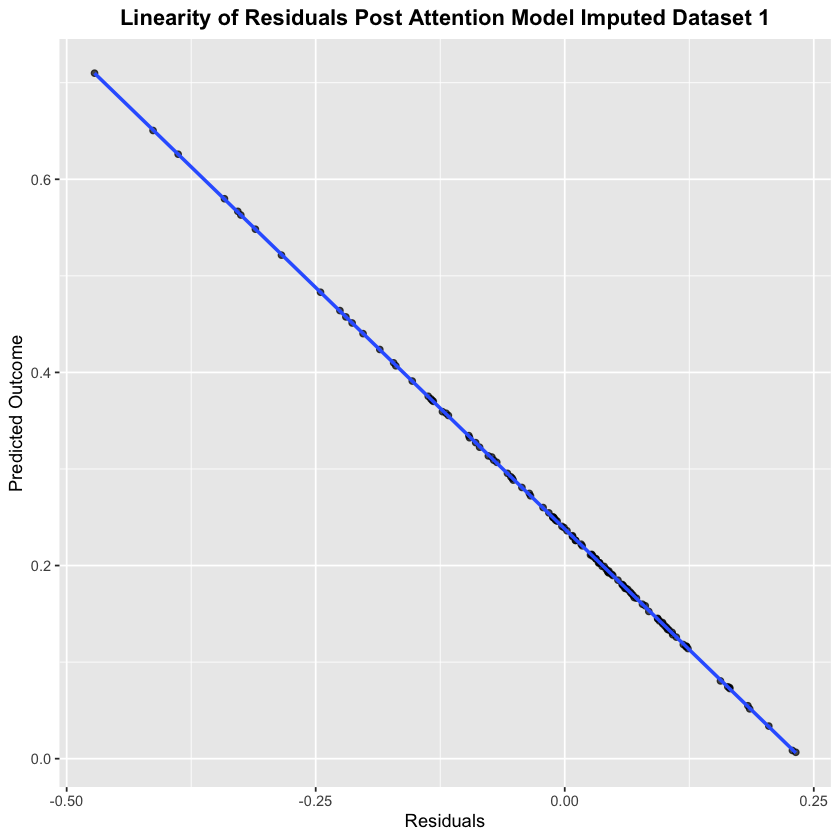

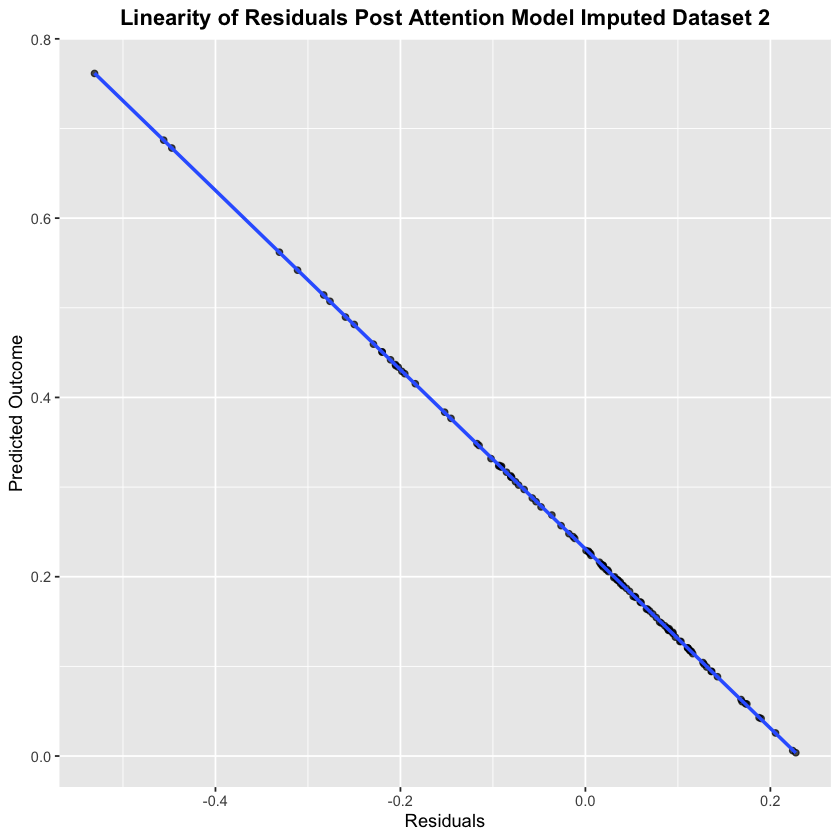

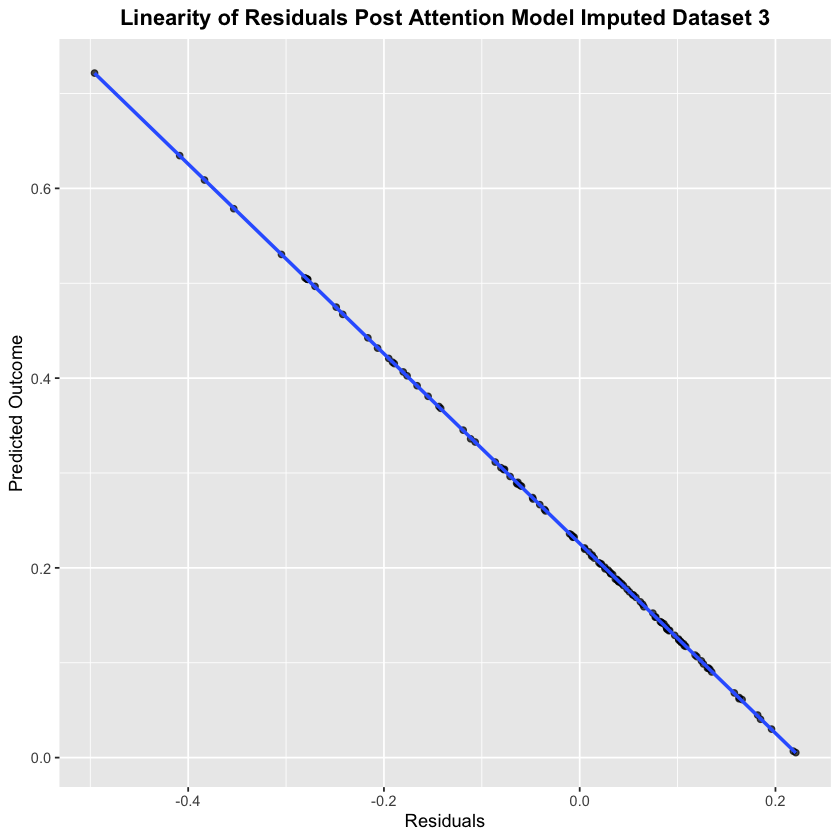

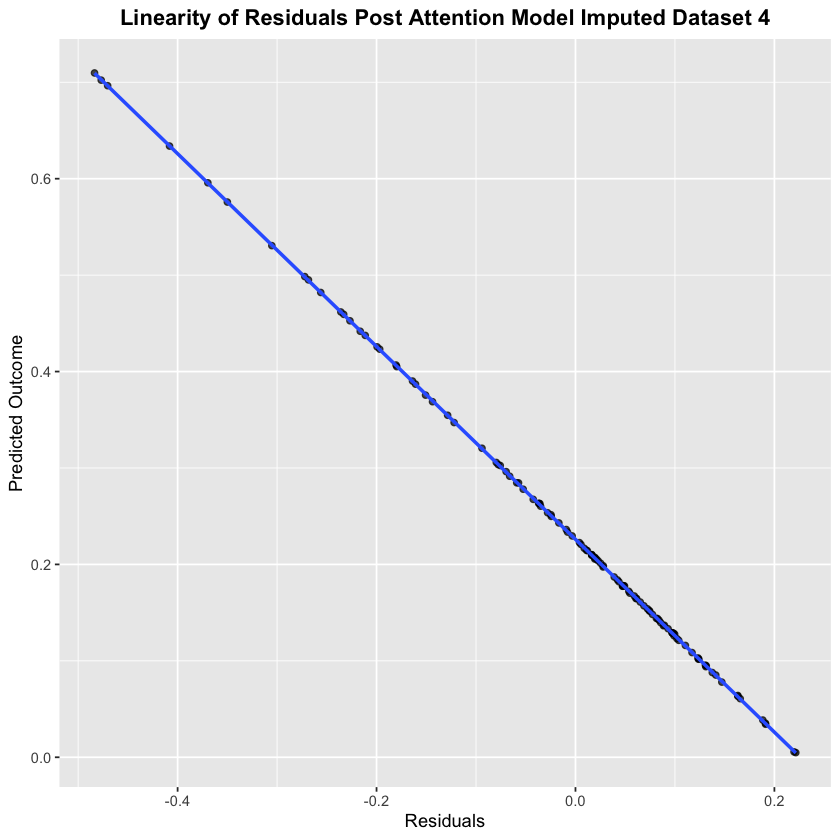

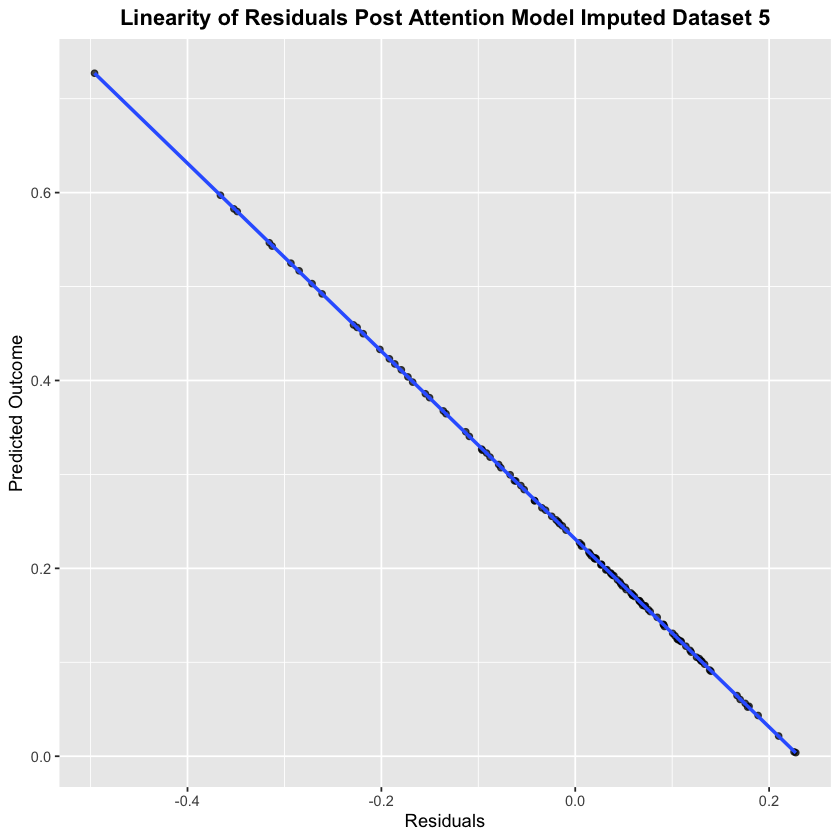

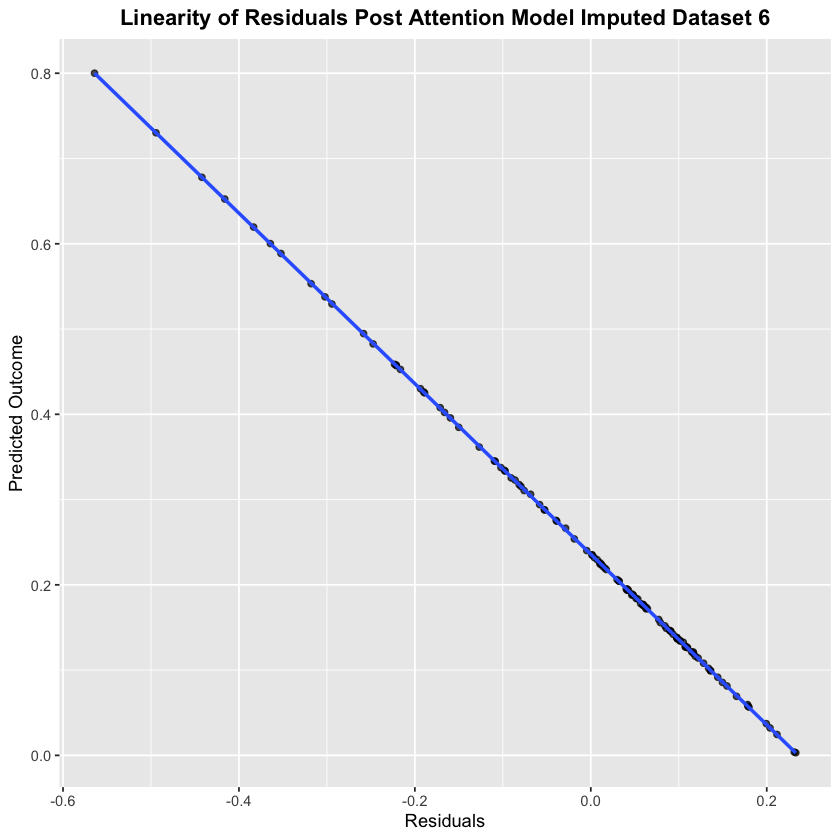

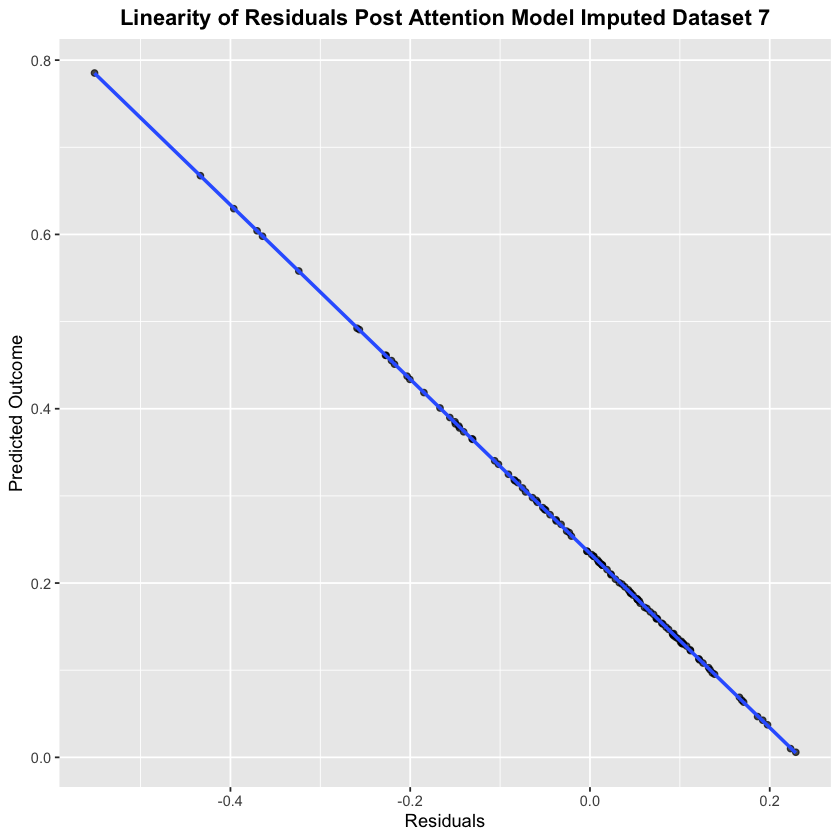

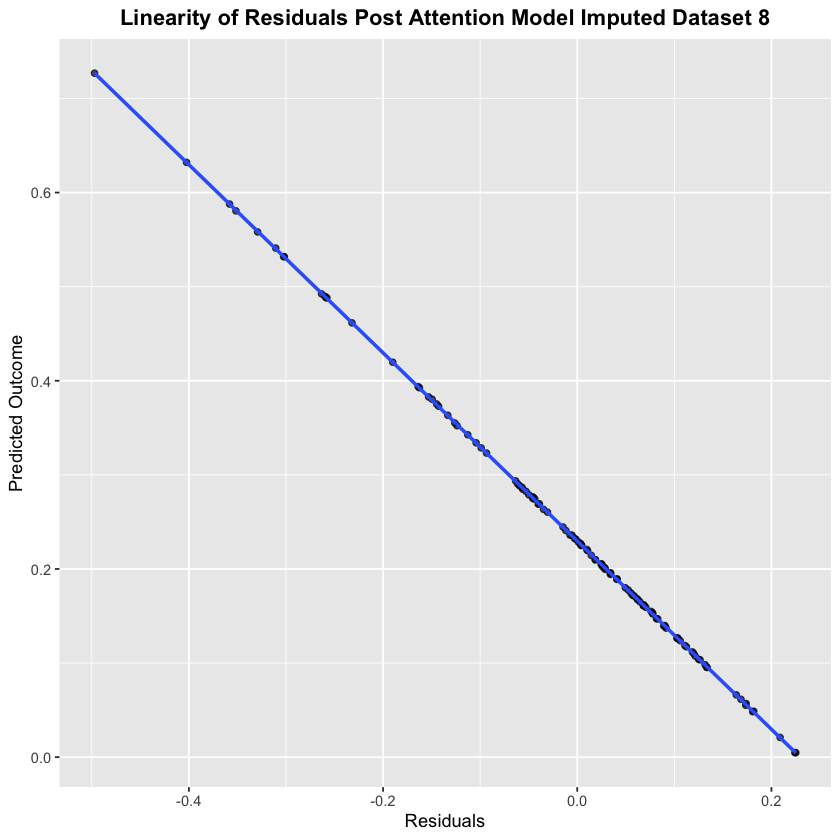

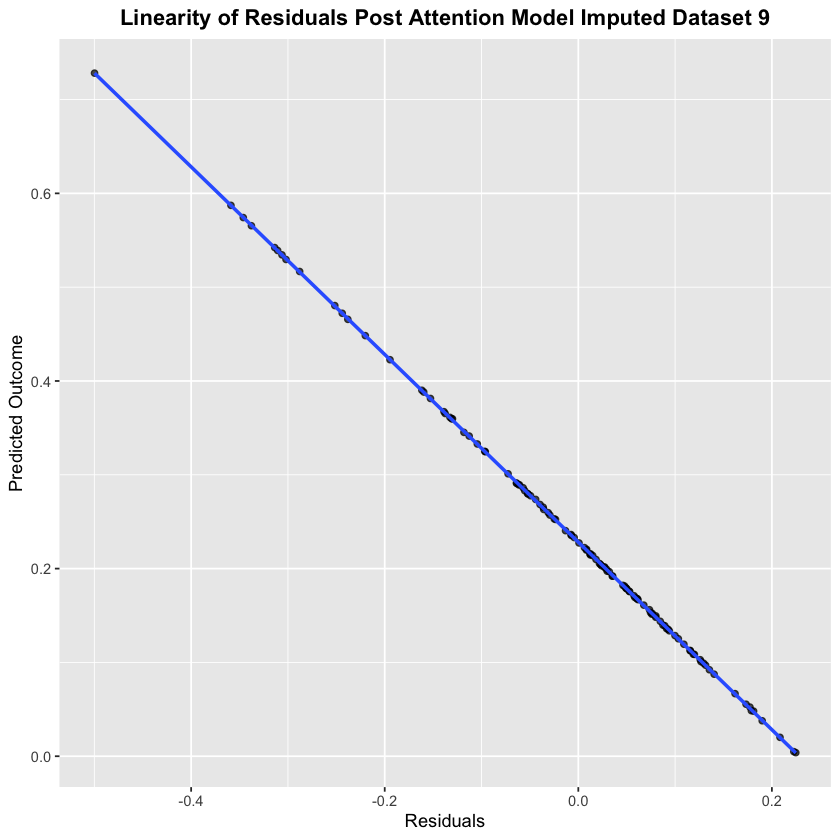

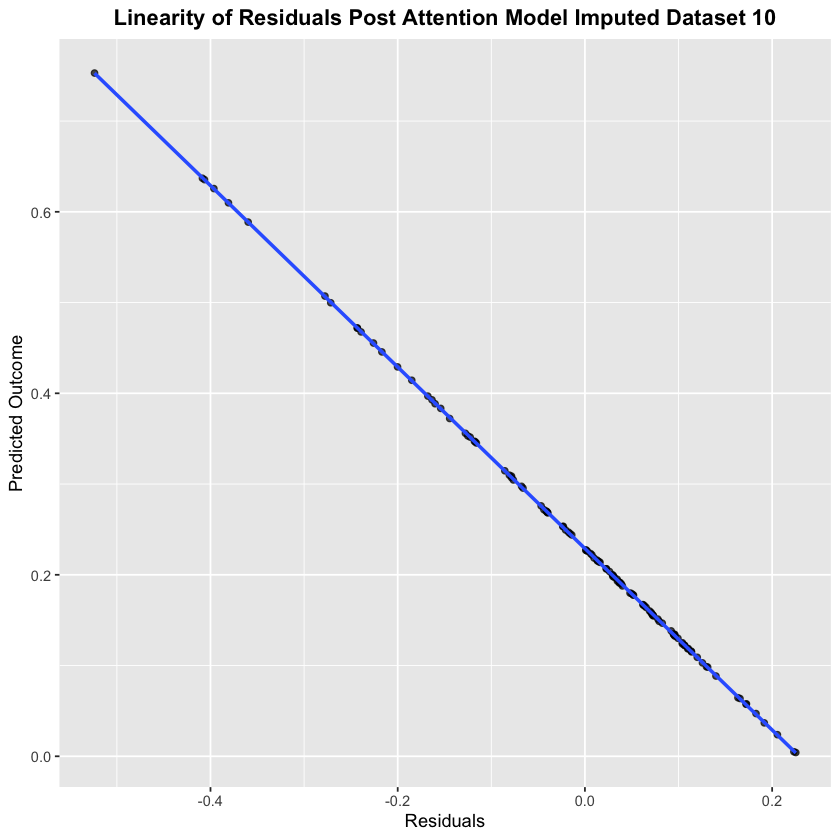

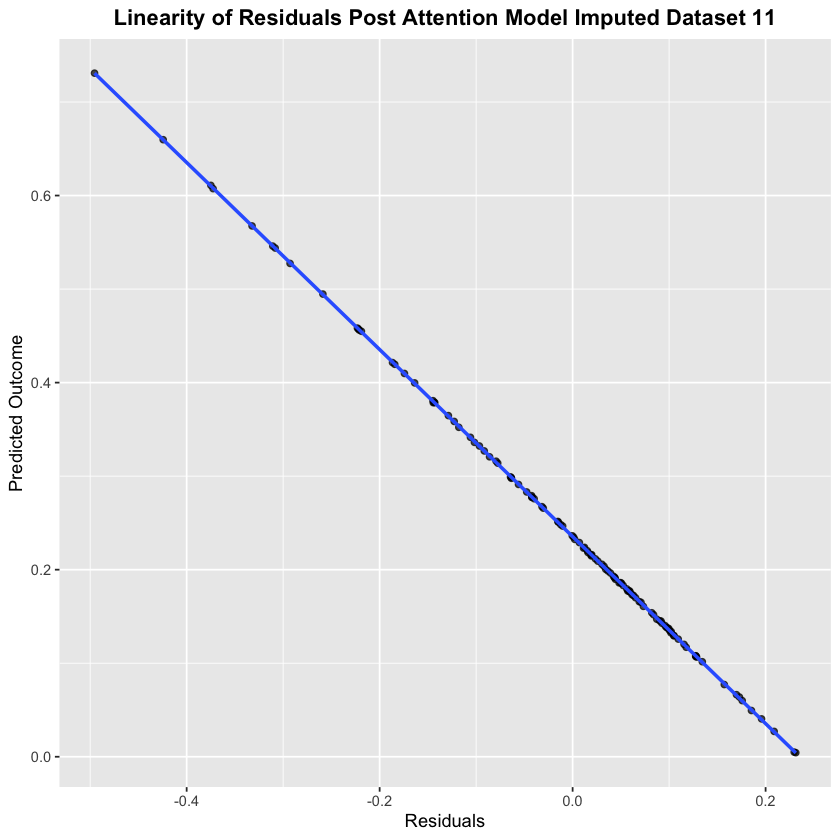

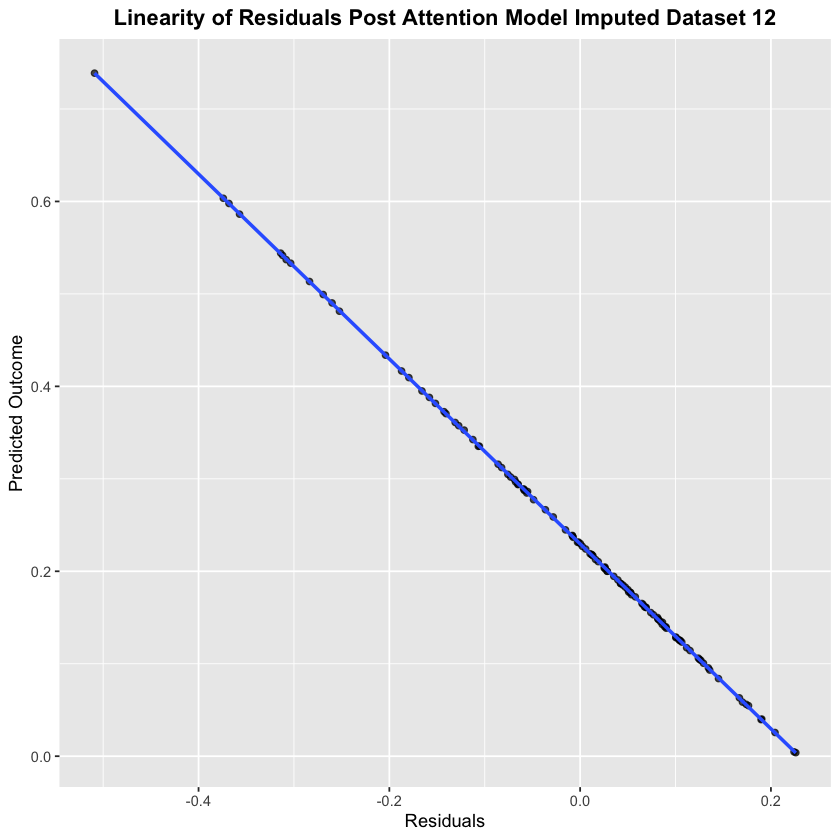

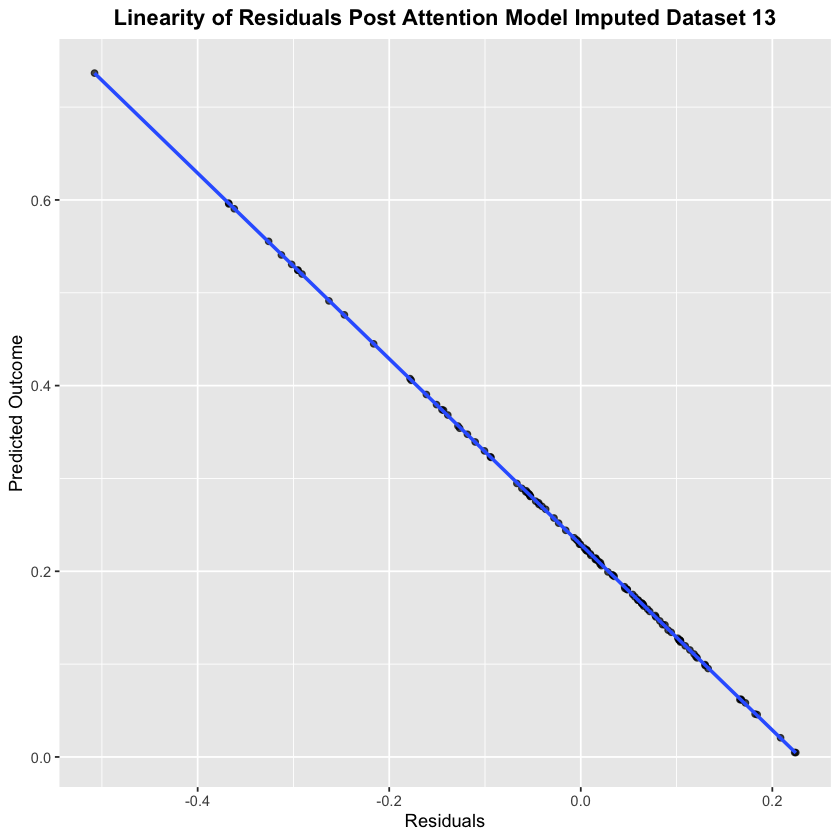

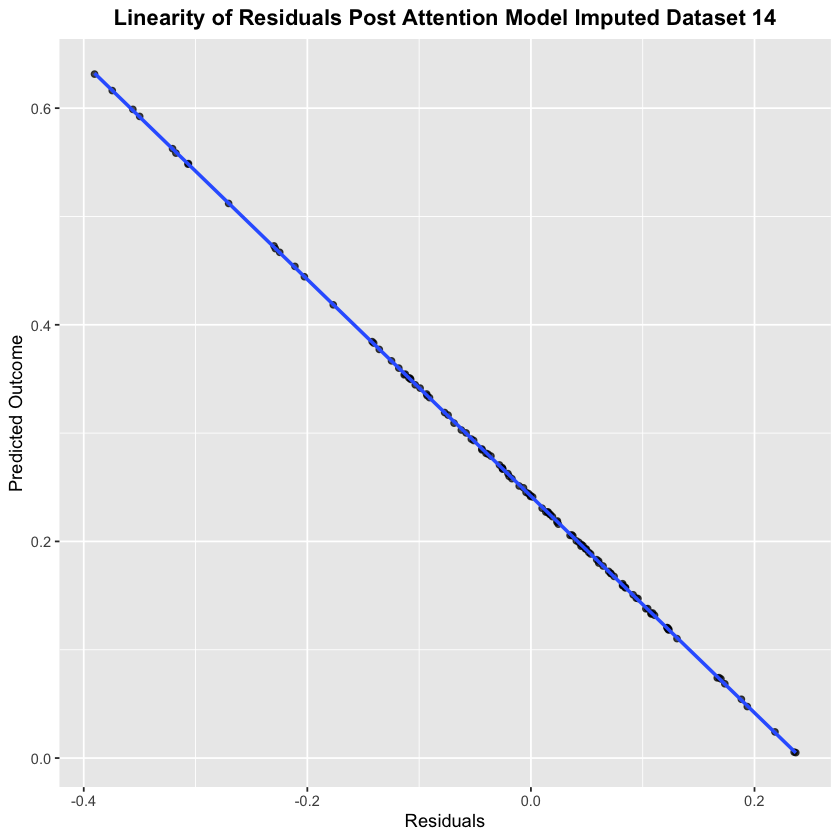

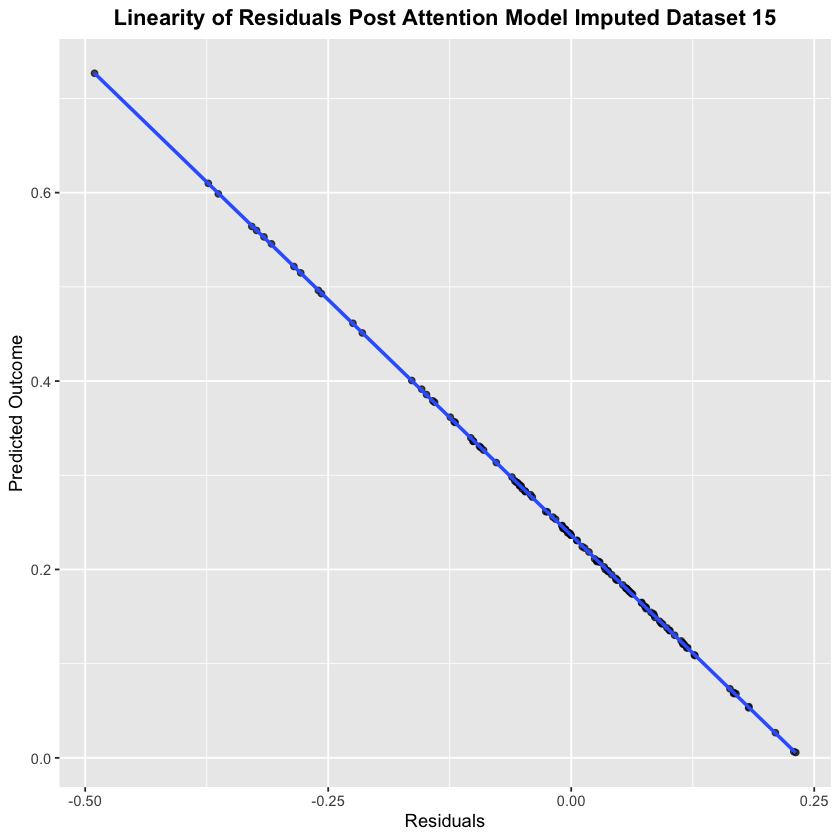

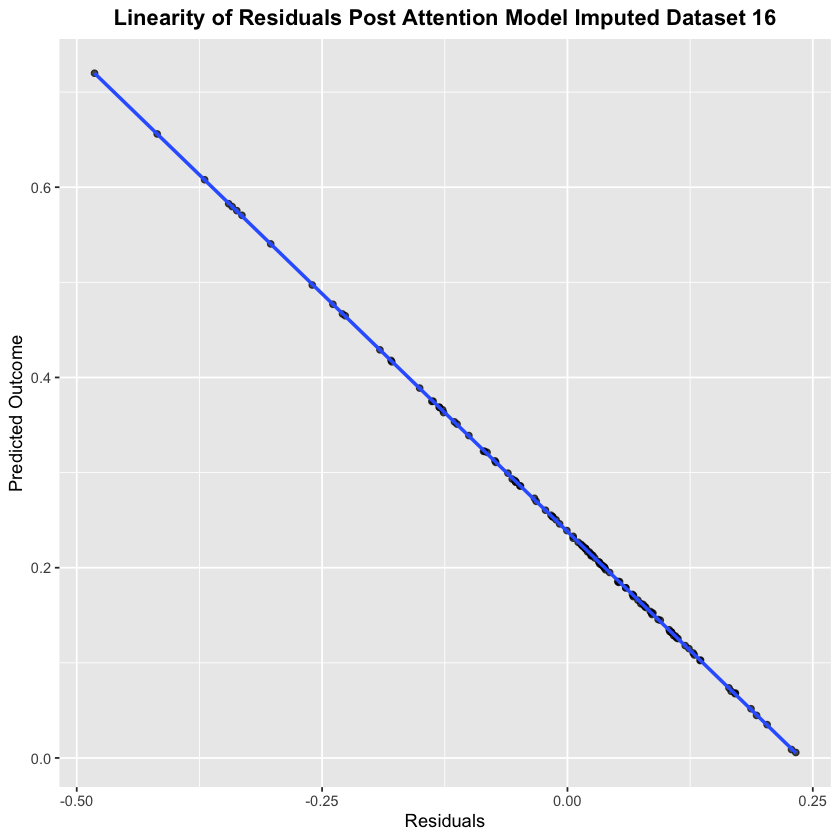

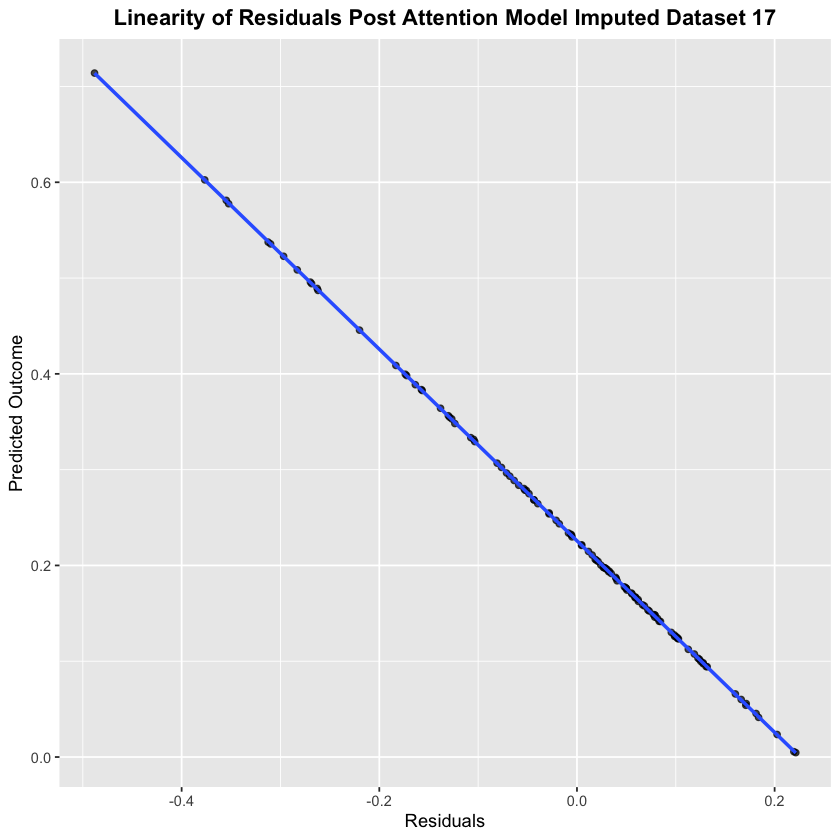

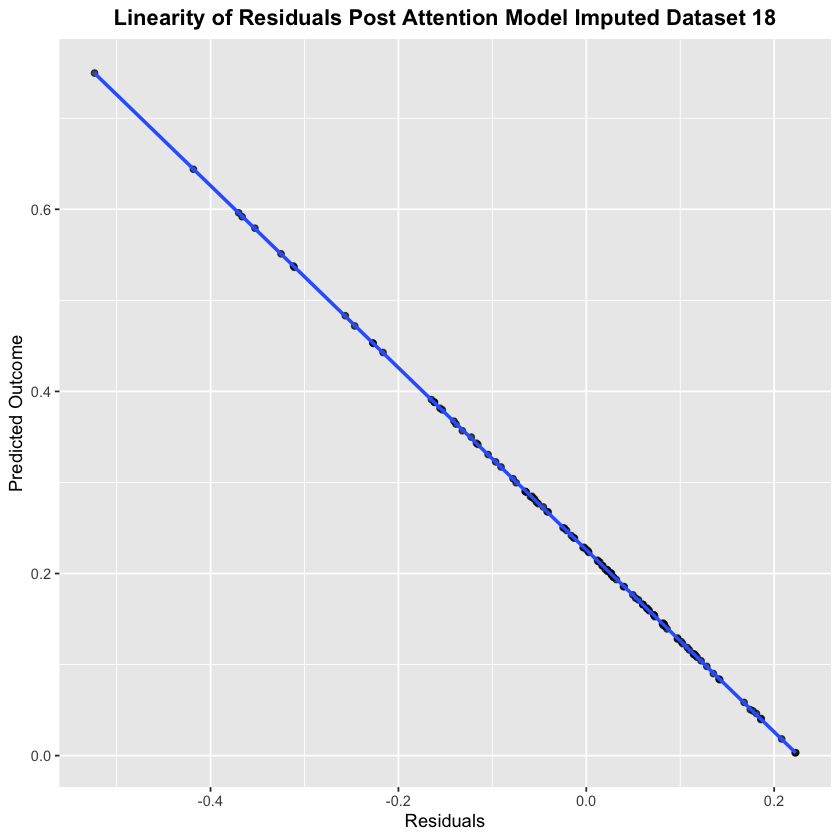

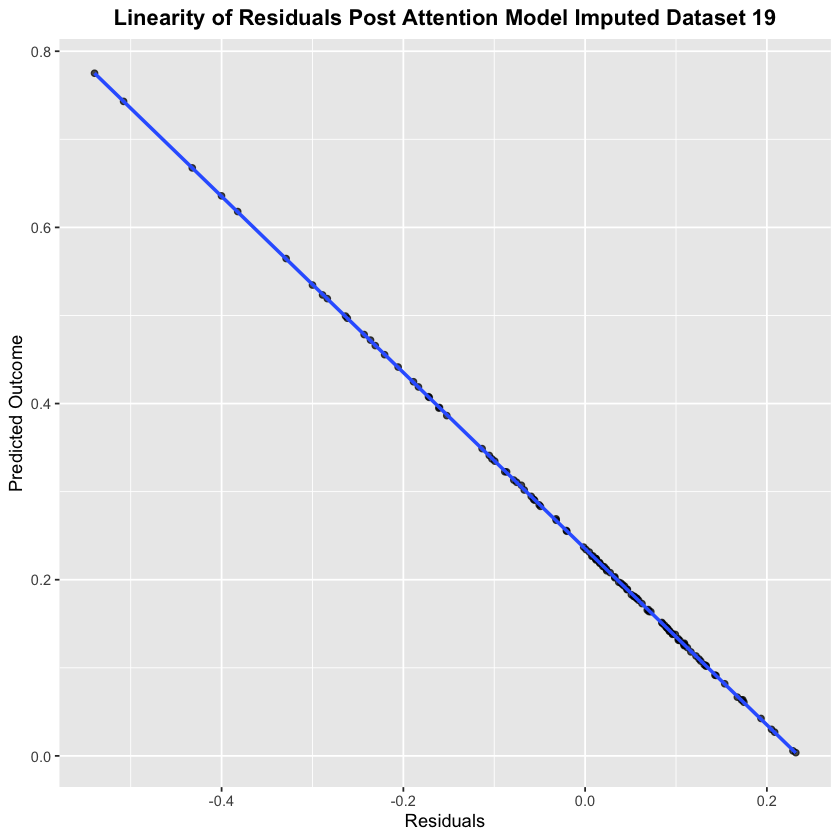

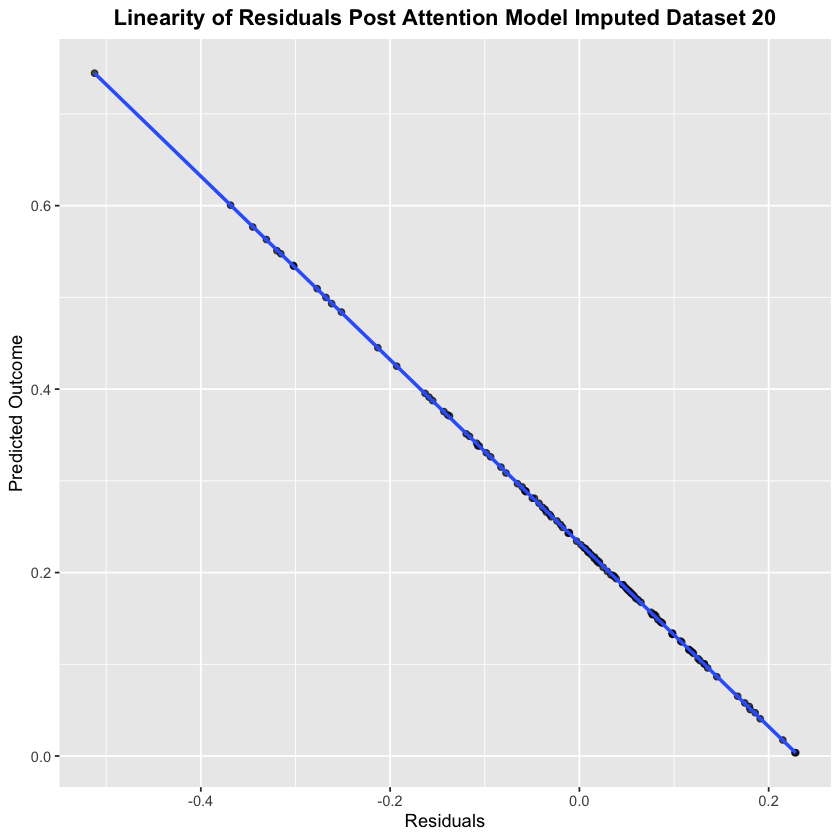

In [5]:
for (i in 1:20){
    pst_df <- cbind(pred=post_pdf[,i+1],resid=post_rdf[,i+1])
    pst_df <- as.data.frame(pst_df)
    post_plot <- ggplot(pst_df,aes(x=resid,y=pred))+
        geom_point(alpha=0.7) +
        labs(x="Residuals",y='Predicted Outcome')

    disp <- post_plot + 
        stat_smooth(geom='smooth',method='lm',formula=y~splines::ns(x,knots=c())) + 
        ggtitle(glue("Linearity of Residuals Post Attention Model Imputed Dataset {i}"))+ 
      theme(plot.title = element_text(face='bold',hjust = 0.5))
    print(disp)

}

In [6]:
head(pst_df)

,pred,resid
,<dbl>,<dbl>
1,0.5509108,-0.31958933
2,0.2432754,-0.01055400
3,0.1148131,0.11733691
4,0.2607870,-0.02978695
5,0.2522858,-0.01987154
6,0.2933993,-0.06045644


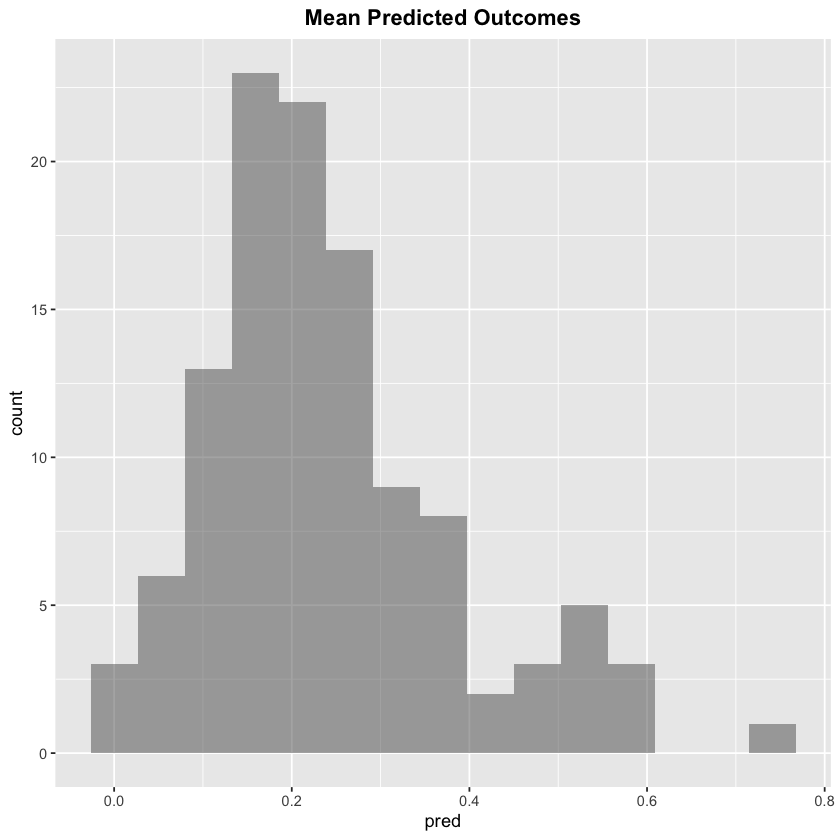

In [10]:
ggplot(pst_df,aes(x=pred)) + 
geom_histogram(alpha=0.5,bins=15) + ggtitle('Mean Predicted Outcomes')+ 
  theme(plot.title = element_text(face='bold',hjust = 0.5))

In [7]:
pre_pdf <- rep(0,115)
pre_rdf <- rep(0,115)
for (i in 1:20){
    preds <- rep(0,115)
    resids <- rep(0,115)
    
    prd_df1 <- cbind(pre_pred[[i]][[1]])
    prd_df2 <- cbind(pre_pred[[i]][[2]])
    prd_df3 <- cbind(pre_pred[[i]][[3]])
    prd_df4 <- cbind(pre_pred[[i]][[4]])
    
    res_df1 <- cbind(pre_res[[i]][[1]])
    res_df2 <- cbind(pre_res[[i]][[2]])
    res_df3 <- cbind(pre_res[[i]][[3]])
    res_df4 <- cbind(pre_res[[i]][[4]])
    
    for (j in 1:115){
        prd_col1 <- prd_df1[,j]
        prd_col2 <- prd_df2[,j]
        prd_col3 <- prd_df3[,j]
        prd_col4 <- prd_df4[,j]
        
        res_col1 <- res_df1[,j]
        res_col2 <- res_df2[,j]
        res_col3 <- res_df3[,j]
        res_col4 <- res_df4[,j]
        
        preds[j] <- mean(c(prd_col1,prd_col2,prd_col3,prd_col4))
        #print(i,j,preds[j])
        resids[j] <- mean(c(res_col1,res_col2,res_col3,res_col4))
    }
    pre_pdf <- cbind(pre_pdf,preds)
    pre_rdf <- cbind(pre_rdf,resids)
}

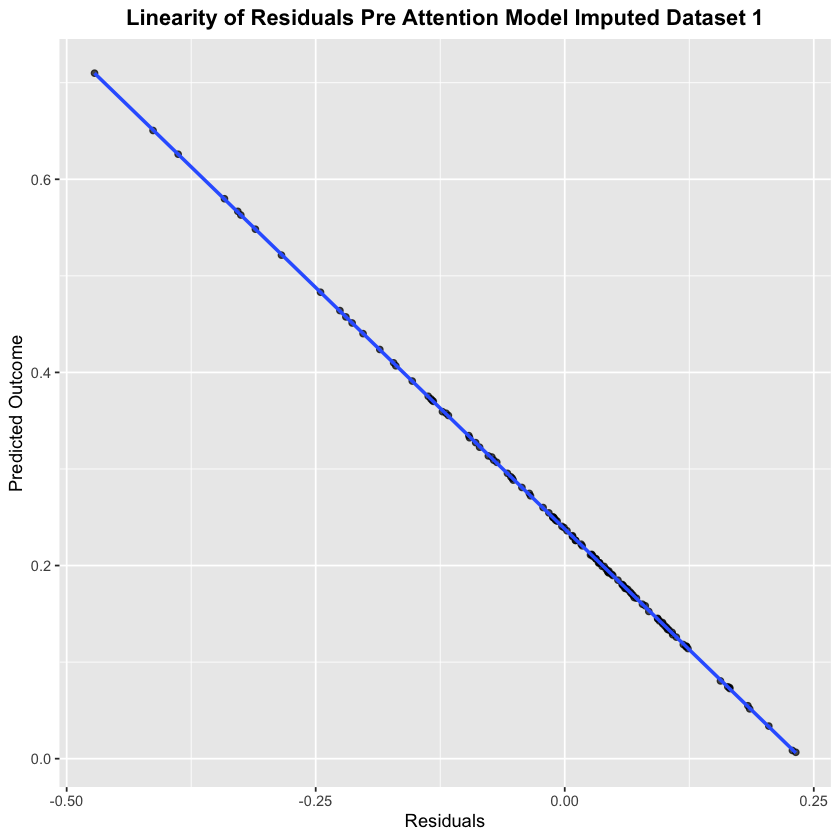

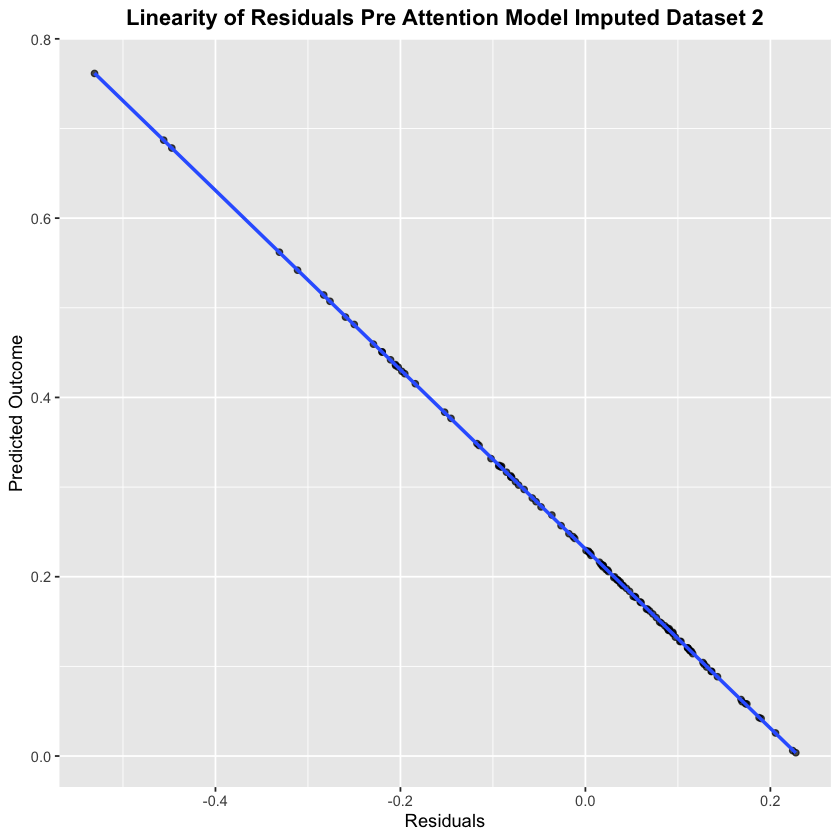

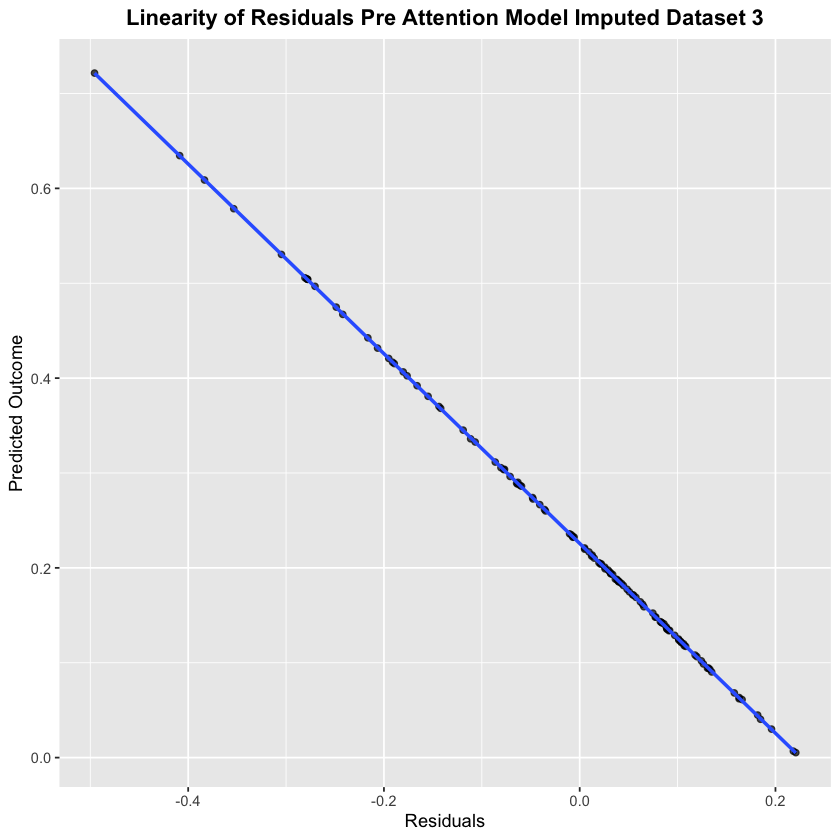

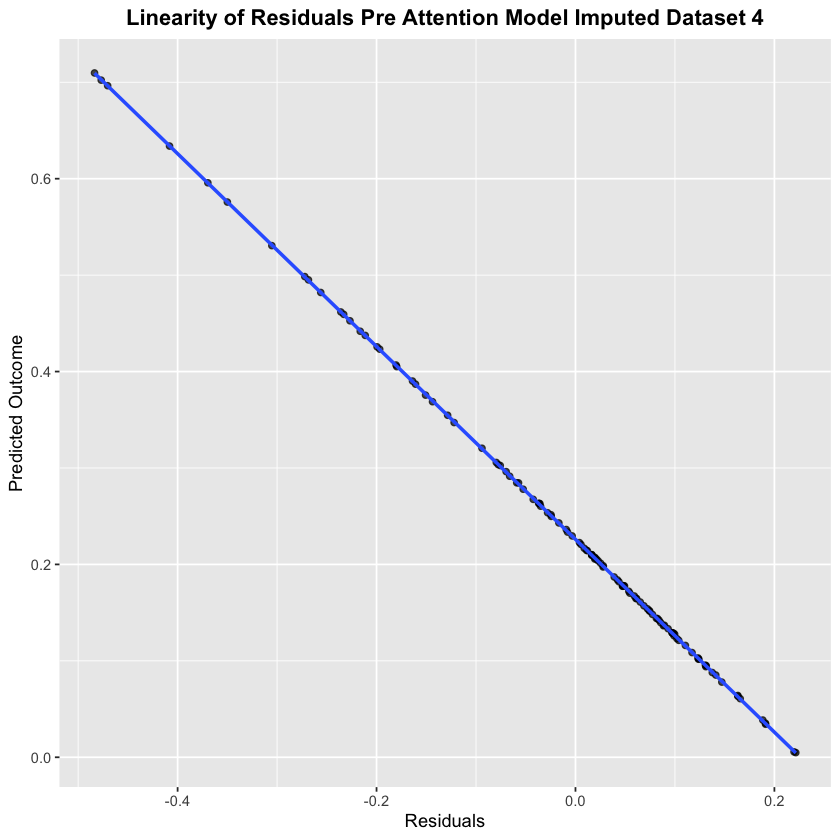

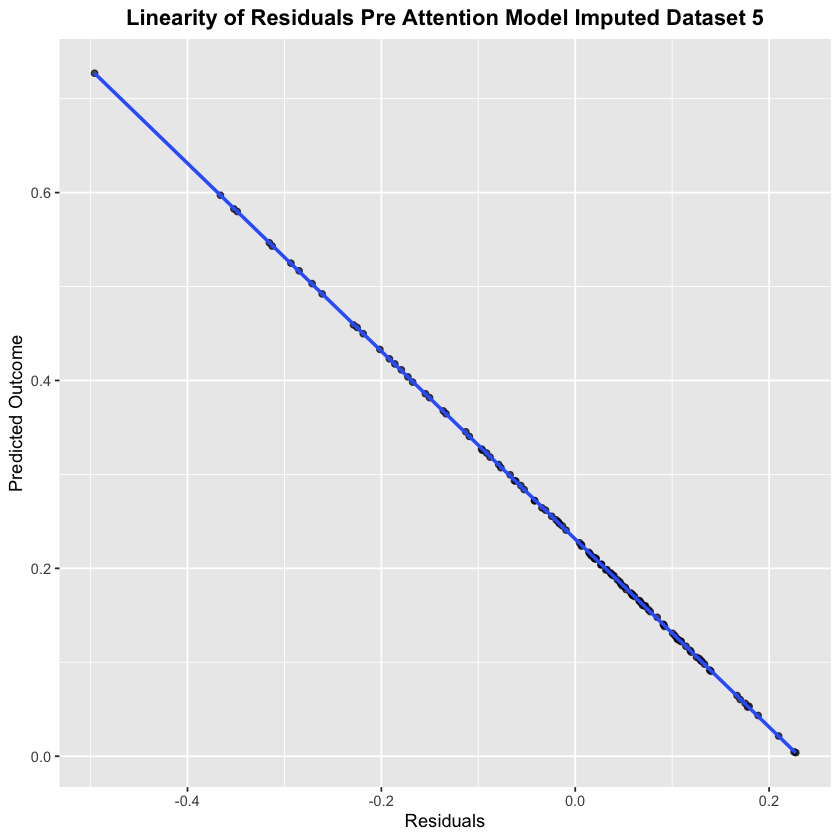

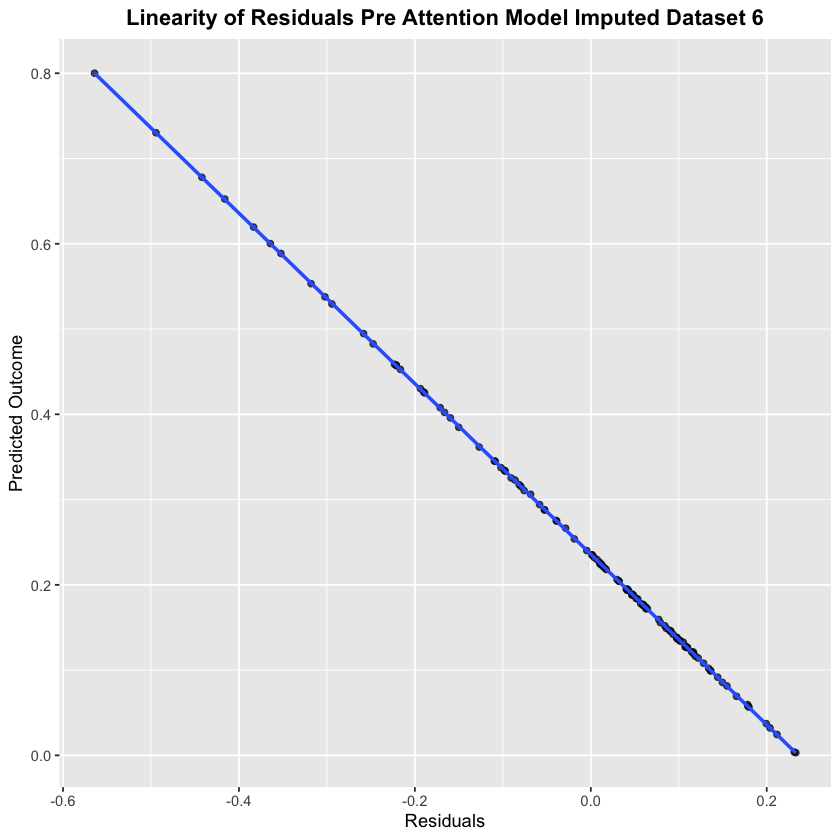

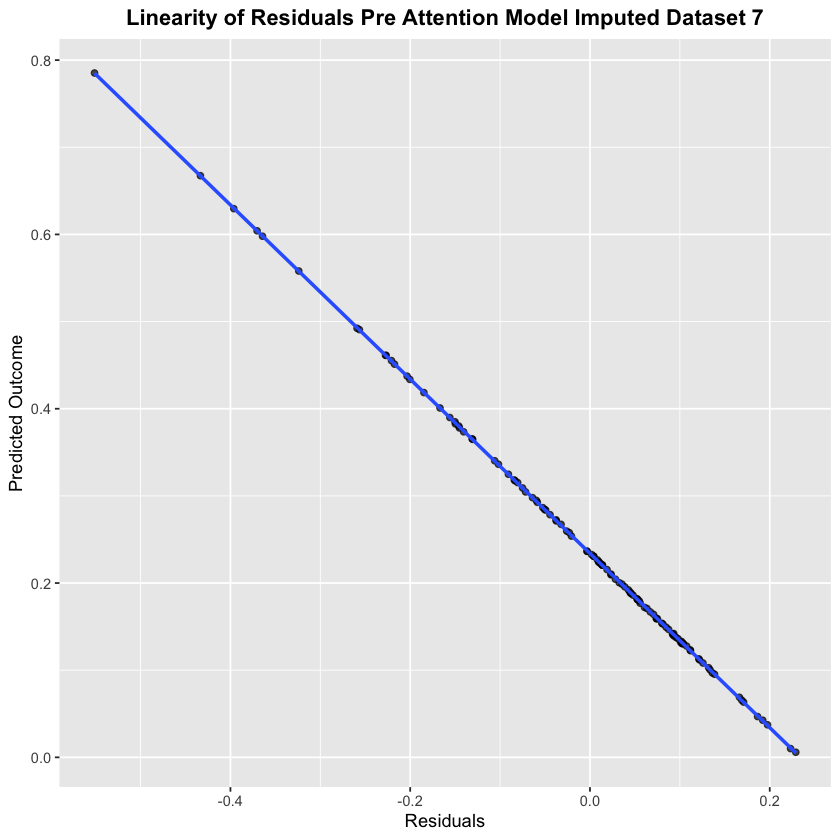

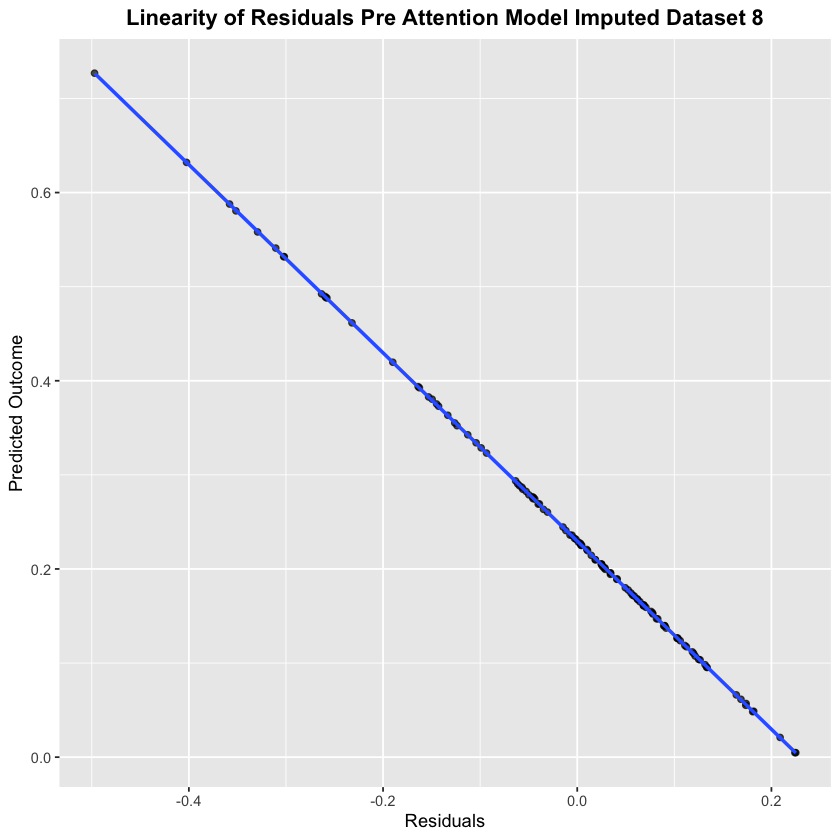

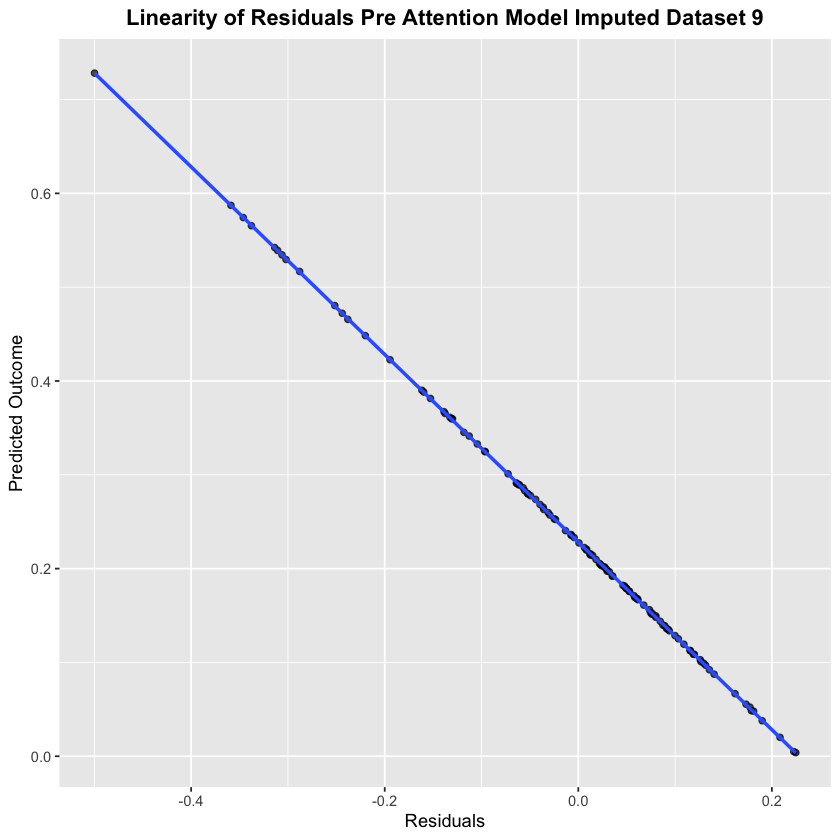

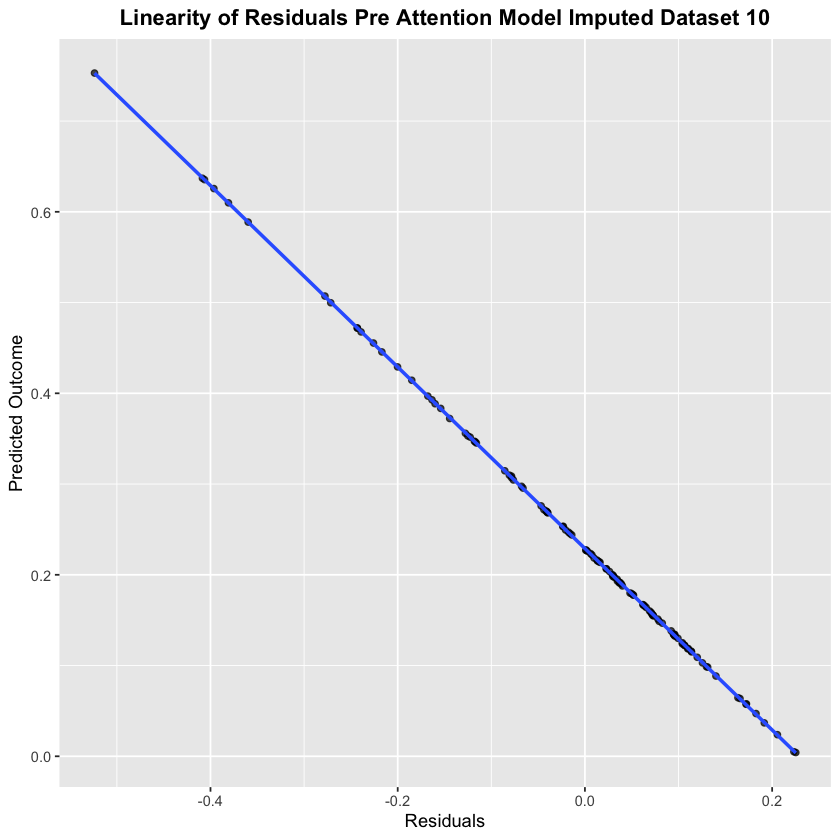

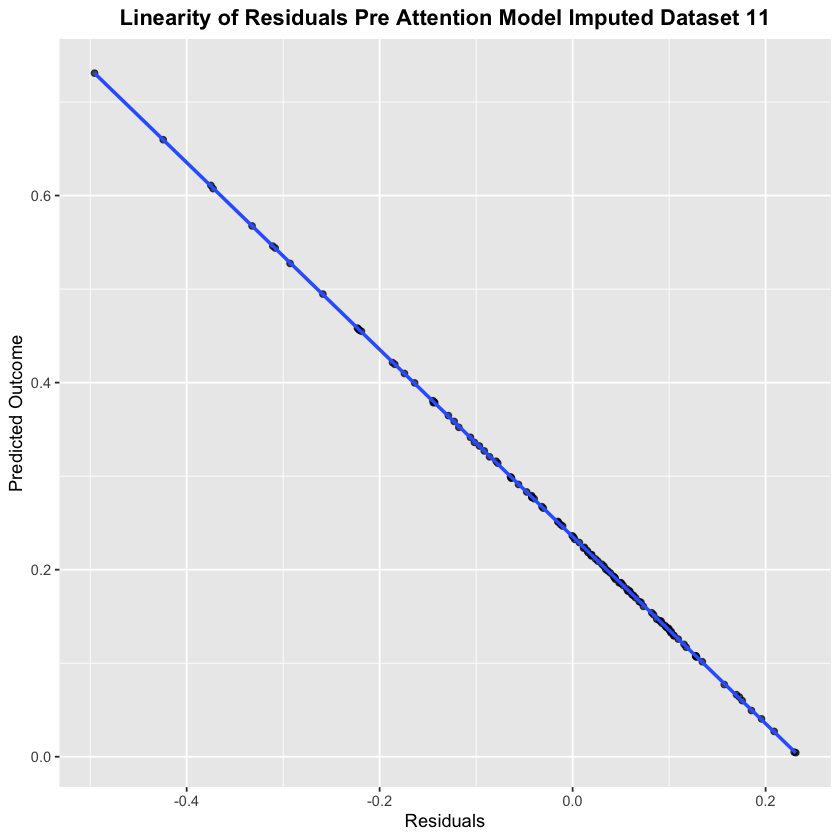

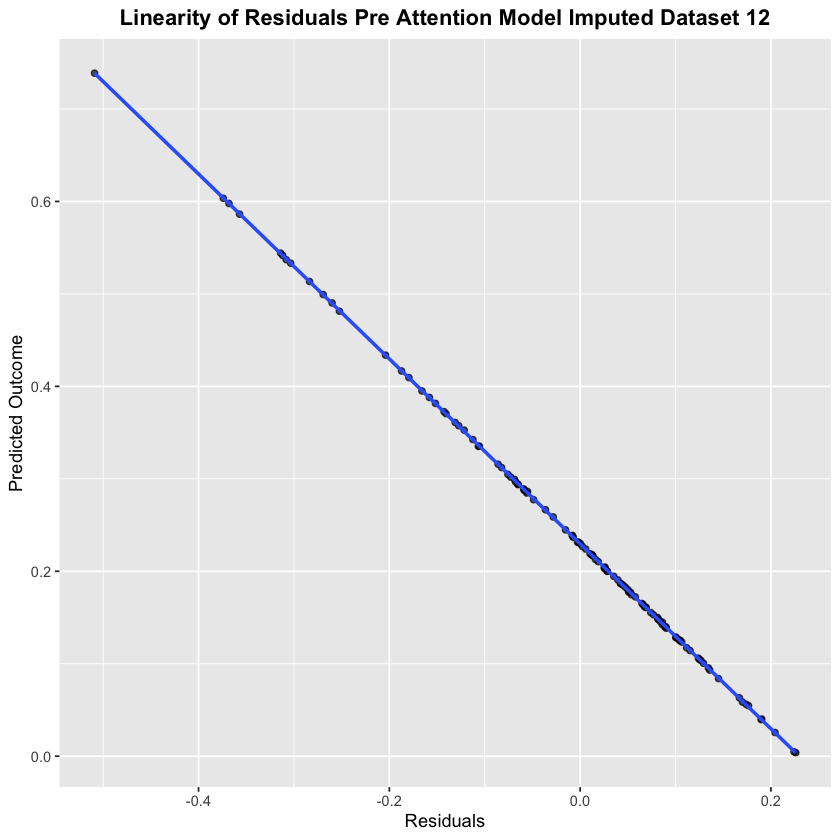

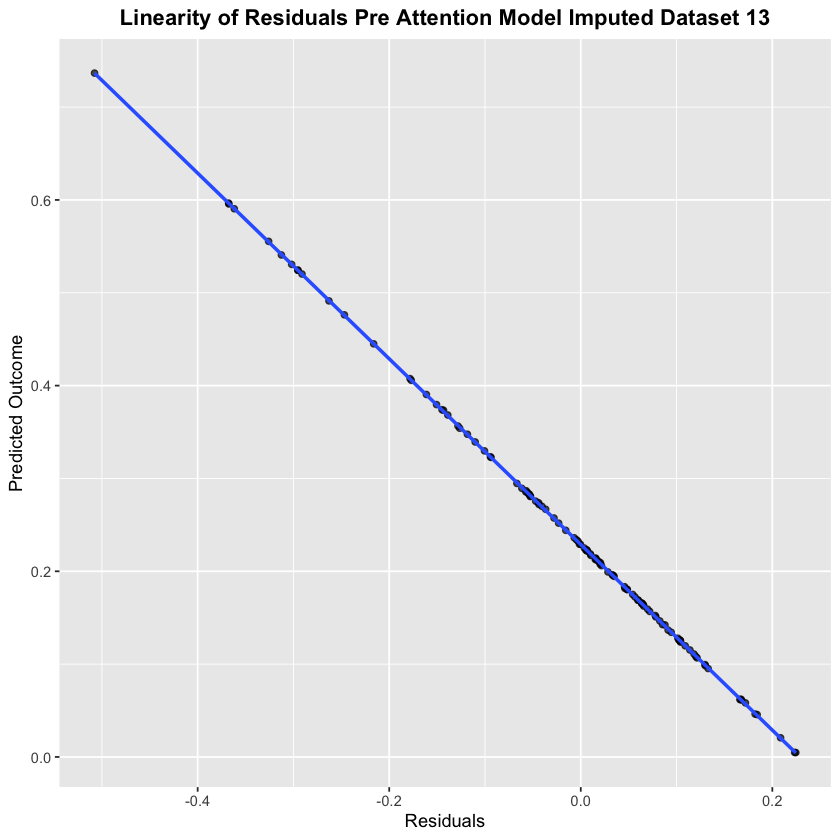

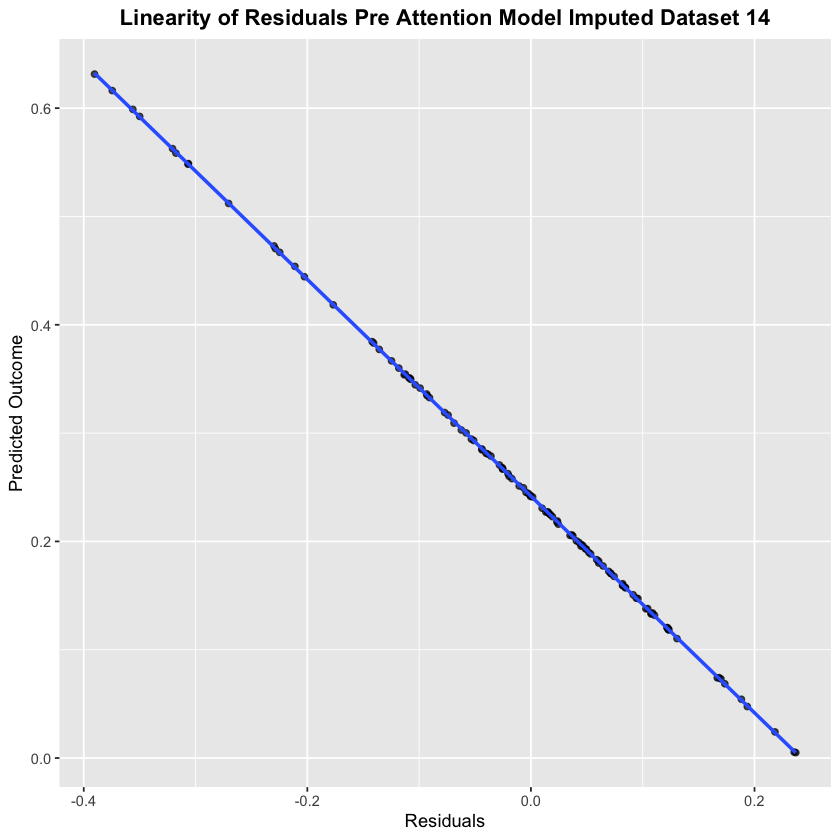

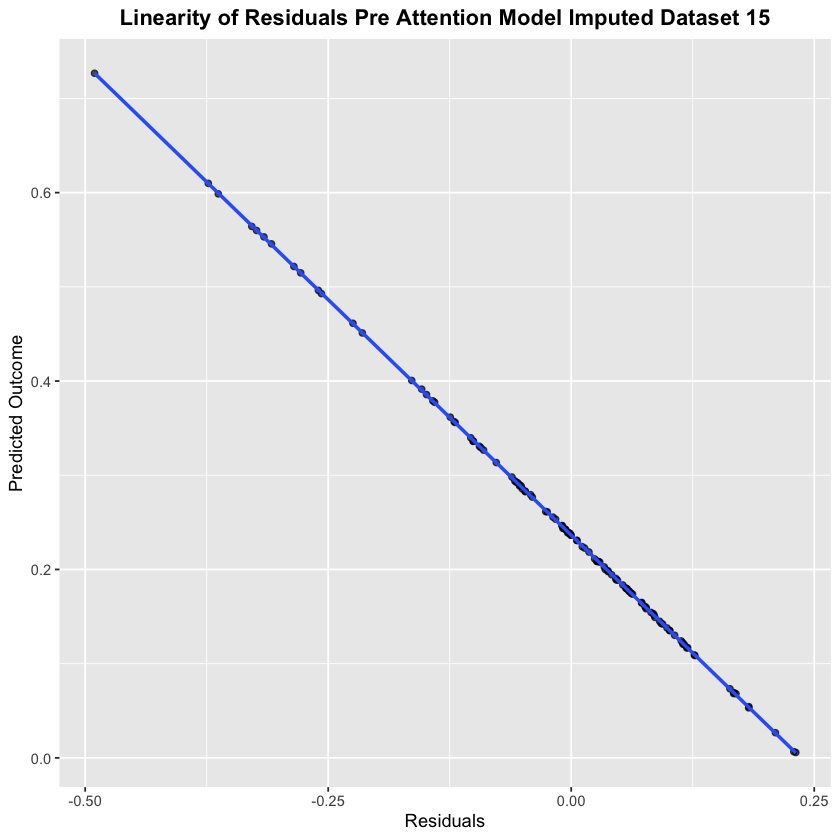

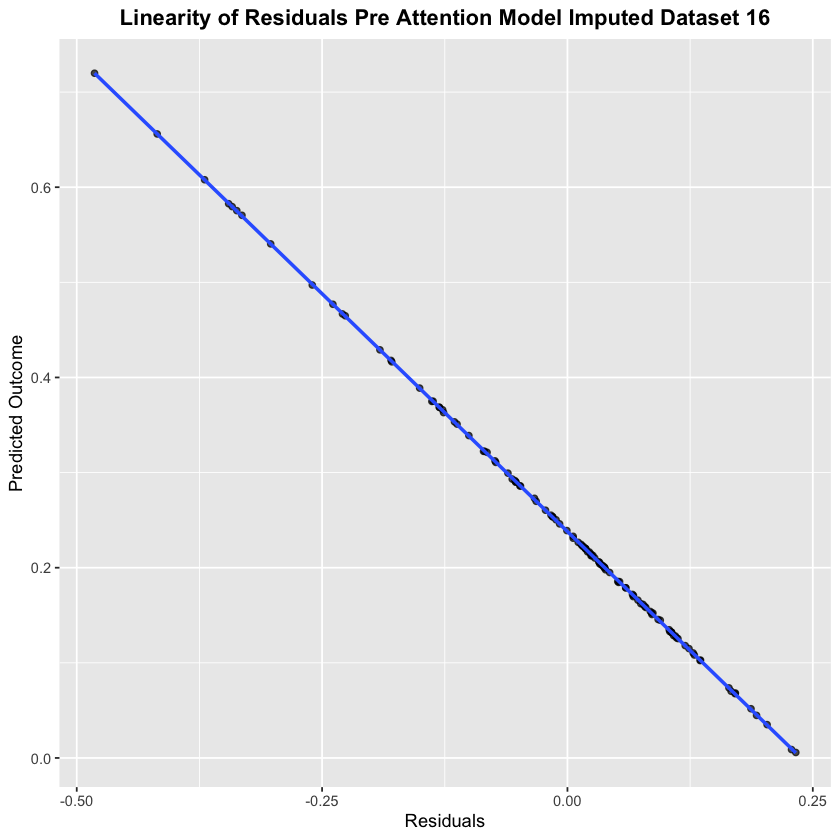

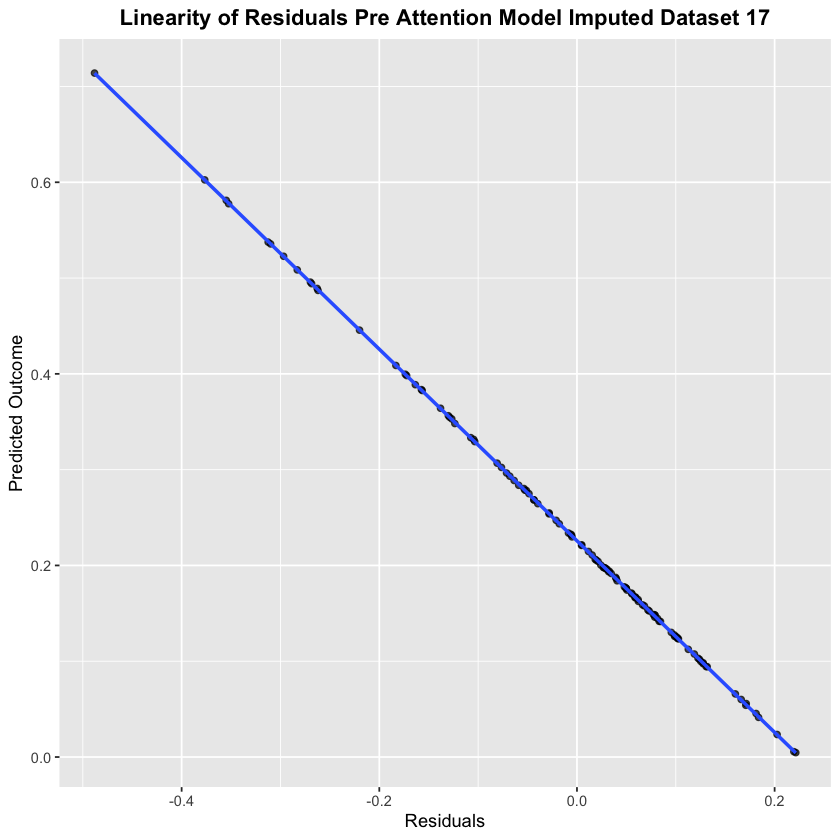

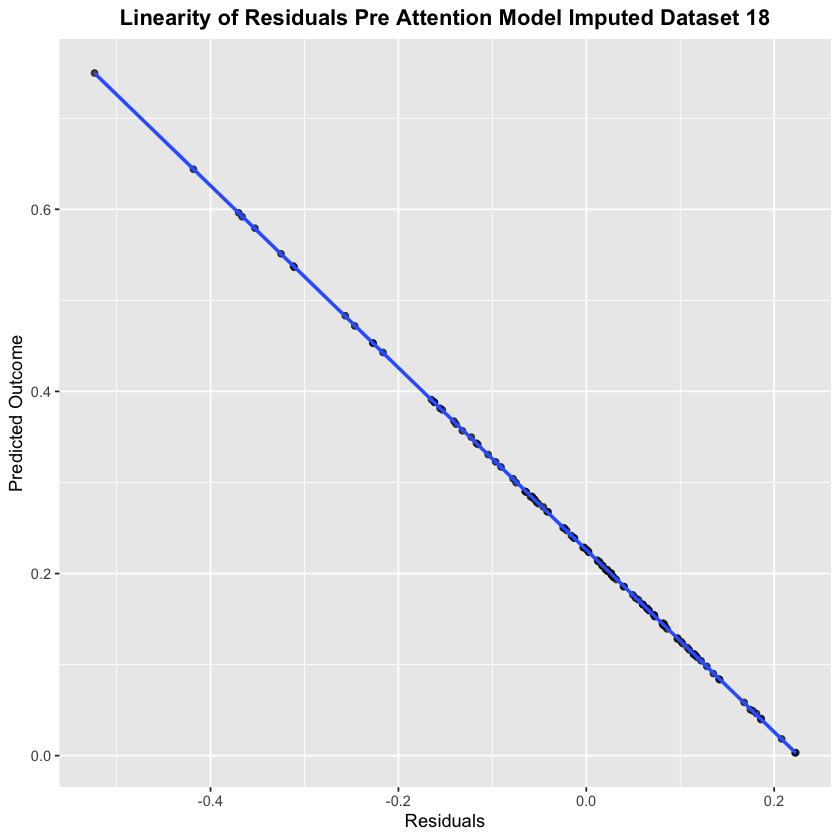

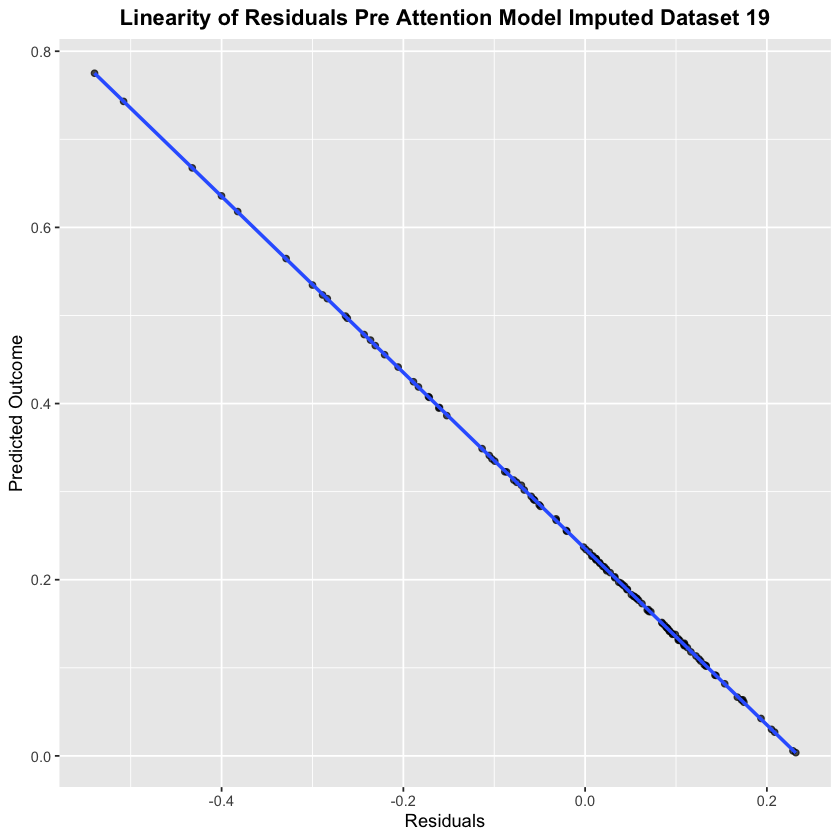

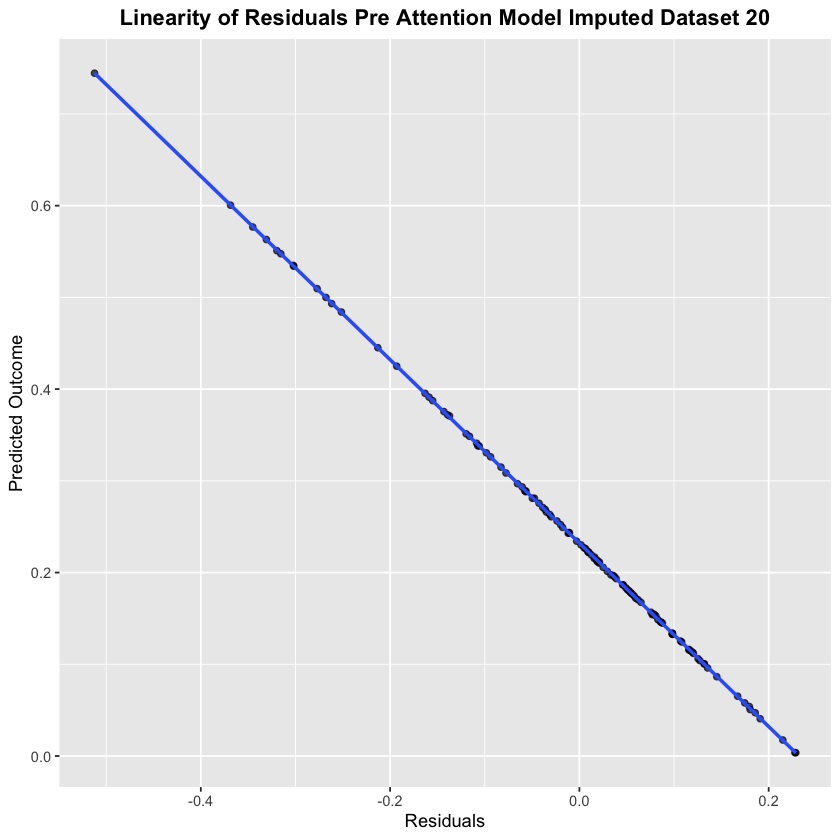

In [9]:
for (i in 1:20){
    pst_df <- cbind(pred=post_pdf[,i+1],resid=post_rdf[,i+1])
    pst_df <- as.data.frame(pst_df)
    post_plot <- ggplot(pst_df,aes(x=resid,y=pred))+
        geom_point(alpha=0.7) +
        labs(x="Residuals",y='Predicted Outcome')

    disp <- post_plot + 
        stat_smooth(geom='smooth',method='lm',formula=y~splines::ns(x,knots=c())) + 
        ggtitle(glue("Linearity of Residuals Pre Attention Model Imputed Dataset {i}"))+ 
      theme(plot.title = element_text(face='bold',hjust = 0.5))
    print(disp)

}